## Equations

We consider the Poisson equation:  

$$
\begin{equation}
\nabla\cdot(\nabla T) + Q_T = 0 \quad \text{in }\Omega
\end{equation}$$
w.r.t Dirichlet-type boundary conditions  
$$  
T(x) = 0 \quad \text{on }\Gamma_D
$$  

where $T$ could be temperature, the subscripts $D$ denotes the Dirichlet-type
boundary conditions.  
Here, the temperature distribution under the impact of a
line shaped source term should be studied.

## Problem Specifications and Analytical Solution

In OGS there are several benchmarks for line source terms in 2d and 3d domains
available.  
Here, some of the 3d benchmarks are described.

### Cylindrical domain

The Poisson equation on cylindrical domain of height $1$ and radius
$r=1$ is solved.  
In the following figure the geometry, partly semi-transparent,
is sketched.  
Furthermore, the mesh resolution is shown in the cylindrical domain
within the first quadrant of the coordinate system.  
In the second quadrant the simulated temperature distribution is depicted.

![Cylindrical domain](temperature_distribution_line_source_term_in_cylinder.png)  

The source term is defined along the line in the center of the cylinder:
$$
\begin{equation}
Q(x) = 1 \quad \text{at } x=0, y=0.
\end{equation}
$$  

In the above figure the source term is the red vertical line in the origin of the coordinate system.

The analytical solution for a line source in the cylinder is
$$
\begin{equation}
T(x) = - \frac{1}{2 \pi} \ln \sqrt{x^2 + y^2}.
\end{equation}
$$






In [9]:
# Define analytical solution
def t_analytical(x,y):
    return -(1/(2*np.pi))*np.log(np.sqrt(x**2 + y**2))

### Analytical solution in ParaView

Since the analytical solution has a singularity at $(x, y) = (0, 0)$ the
analytical solution in ParaView is generated as follows:  

```none
if (coordsX^2<0.0001 & coordsY^2<0.0001, temperature, -1/(4*asin(1))*ln(sqrt(coordsX^2+coordsY^2))
```

## Numerical simulation

There are meshes with two different resolution (49k and 286k cells).

### 49k

In [1]:
# Create output path if it doesn't exist yet
import os

out_dir = os.environ.get('OGS_TESTRUNNER_OUT_DIR', '_out')

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [3]:
# Import OGS class
from ogs6py.ogs import OGS

# Initiate an OGS-object
model=OGS(INPUT_FILE="49k_prisms/line_source_term_in_cylinder.prj", PROJECT_FILE=f"{out_dir}/49k_modified.prj")
model.write_input()

# Run OGS
model.run_model(logfile=f"{out_dir}/49k_out.txt", args=f"-o {out_dir} -m .")

OGS finished with project file _out_49k/modified.prj.
Execution took 6.5585715770721436 s


## 286k

In [4]:
# Create output path if it doesn't exist yet
import os

out_dir = os.environ.get('OGS_TESTRUNNER_OUT_DIR', '_out')

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [6]:
# Import OGS class
from ogs6py.ogs import OGS

# Initiate an OGS-object
model=OGS(INPUT_FILE="286k_prisms/line_source_term_in_cylinder.prj", PROJECT_FILE=f"{out_dir}/286k_modified.prj")
model.write_input()

# Run OGS
model.run_model(logfile=f"{out_dir}/286k_out.txt", args=f"-o {out_dir} -m .")

OGS finished with project file _out_286k/modified.prj.
Execution took 27.759730100631714 s


## Results and evaluation

The following plot shows the temperature along the white line in the figure above.


['heat_flux', 'temperature']


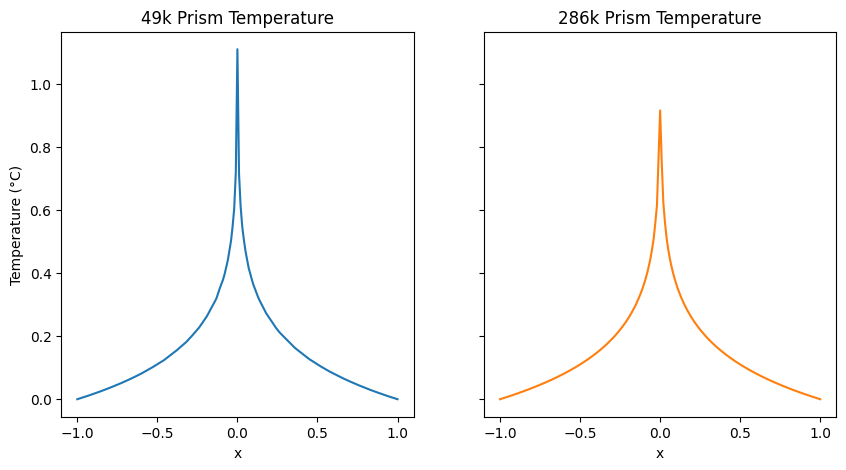

In [10]:
import os
import vtuIO
import numpy as np
import matplotlib.pyplot as plt

# Extract values along a line in the domain

# Load results
pvdfile_286k= vtuIO.PVDIO(f"{out_dir}/3D_line_source_term_in_cylinder_286k.pvd", dim=3)
pvdfile_49k= vtuIO.PVDIO(f"{out_dir}/3D_line_source_term_in_cylinder_49k.pvd", dim=3)

# Get point field names
fields = pvdfile_286k.get_point_field_names()
print(fields)

# Extract values along line
length = np.linspace(-1, 1, 201)

# Draws a line through the domain for sampling results
z_axis=[(i,0,0.5) for i in length]

# Extract timestep
timestep = 1
temp_286k = pvdfile_286k.read_set_data(timestep, "temperature", pointsetarray=z_axis)
temp_49k = pvdfile_49k.read_set_data(timestep, "temperature", pointsetarray=z_axis)


# Plot
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)

# 49k
ax[0].plot(length, temp_49k, label = "49k prism", color="tab:blue")
ax[0].set_title("49k Prism Temperature")
ax[0].set_xlabel("x")
ax[0].set_ylabel("Temperature (°C)")

# 286k
ax[1].plot(length, temp_286k, label = "286k prism", color="tab:orange")
ax[1].set_title("286k Prism Temperature")
ax[1].set_xlabel("x")

plt.show()

### Comparison with analytical solution:

The differences of analytical and computed solutions for two different domain discretizations are small outside of the center.  
(In the finer mesh the error outside of the middle region is smaller than in the coarser mesh.) 

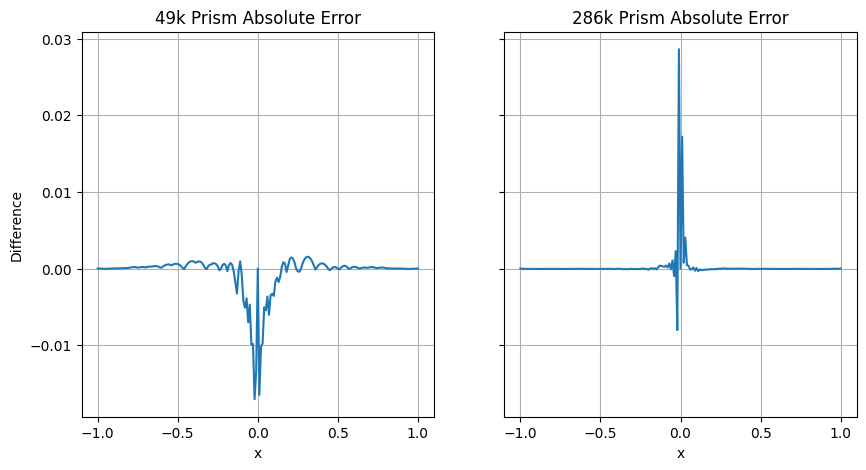

In [11]:
# Combine analytical solution with numerical solution at singularity in (x,y)=(0,0)

# Create reference for error calculation

# Replace 0 with 1 to prevent division by 0, the respective element will be replaced with the numerical solution anyway 
length_replaced = length.copy()
length_replaced[100] = 1

compare286 = t_analytical(length_replaced,0)
compare286[100] = temp_286k[100] # Only the 100th point has x,y < 0.0001
compare49 = t_analytical(length_replaced,0)
compare49[100] = temp_49k[100]

# Plot
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey = True)

# 49k Absolute error
abs_error49 = temp_49k-compare49
ax[0].plot(length, abs_error49)
ax[0].grid(True)
ax[0].set_title("49k Prism Absolute Error")
ax[0].set_xlabel("x")
ax[0].set_ylabel("Difference")

# 286k Absolute error
abs_error286 = temp_286k-compare286
ax[1].plot(length, abs_error286)
ax[1].grid(True)
ax[1].set_title("286k Prism Absolute Error")
ax[1].set_xlabel("x")

plt.show()

Due to the numerical evaluation of the relative error of the computed solution the error grows in the vicinity of the boundary and in the center.


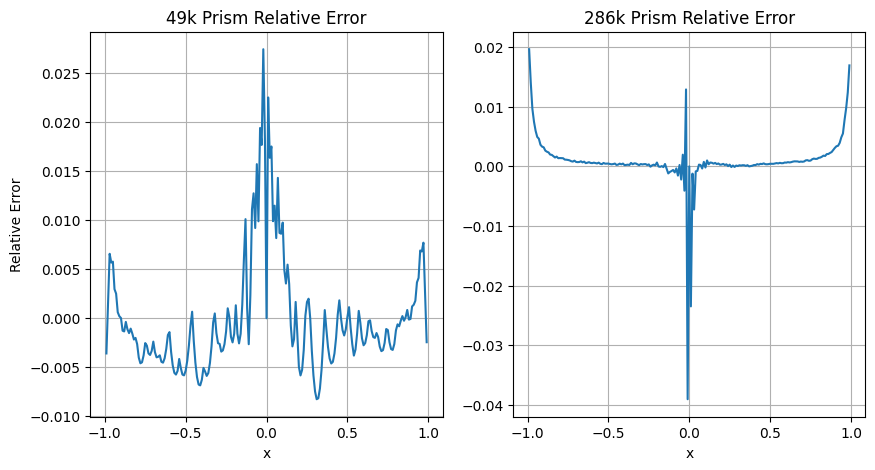

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

# 49k Relative error, exclude first and last element to prevent division by zero
rel_error49 = (compare49[1:-1]-temp_49k[1:-1])/compare49[1:-1]
ax[0].plot(length[1:-1], rel_error49)
ax[0].grid(True)
ax[0].set_title("49k Prism Relative Error")
ax[0].set_xlabel("x")
ax[0].set_ylabel("Relative Error")

# 286k Relative error
rel_error286 = (compare286[1:-1]-temp_286k[1:-1])/compare286[1:-1]
ax[1].plot(length[1:-1], rel_error286)
ax[1].grid(True)
ax[1].set_title("286k Prism Relative Error")
ax[1].set_xlabel("x")

plt.show()

### Input files

The project files for the described models are
[49k.prj](https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/Parabolic/T/3D_line_source_term_tests/3D_line_source_term_in_cylinder/49k_prisms/line_source_term_in_cylinder.prj)
and
[286k.prj](https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/Parabolic/T/3D_line_source_term_tests/3D_line_source_term_in_cylinder/286k_prisms/line_source_term_in_cylinder.prj).  
The project files describe the processes to be solved and the related process variables together with their initial and boundary conditions as well as the source terms.  

The input meshes are stored in the VTK file format and can be directly visualized in ParaView for example.


### Cylindrical domain - axisymmetric example

The Poisson equation on cylindrical domain of height $1$ and radius
$r=1$ is solved.  
The cylindrical domain is defined as axisymmetric. 

#### Numerical simulation


In [13]:
# Create output path if it doesn't exist yet
import os

out_dir = os.environ.get('OGS_TESTRUNNER_OUT_DIR', '_out')

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [14]:
# Import OGS class
from ogs6py.ogs import OGS

# Initiate an OGS-object
# Pass it the project file and set an output file
model=OGS(INPUT_FILE="3D_line_source_term_in_cylinder_axisymmetric/line_source_term_in_cylinder.prj", PROJECT_FILE=f"{out_dir}/axisym_modified.prj")

# Write input
model.write_input()

# Run OGS
model.run_model(logfile=f"{out_dir}/axisym_out.txt", args=f"-o {out_dir} -m .")

OGS finished with project file _out_ax/modified.prj.
Execution took 0.6381680965423584 s


#### Results and evaluation

In [15]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt

# Load file
pvdfile_ax= vtuIO.PVDIO(f"{out_dir}/3D_line_source_term_in_cylinder.pvd", dim=3)


# Get point field names
fields = pvdfile_ax.get_point_field_names()
print(fields)

['HeatFlowRate', 'analytical_result', 'analytical_result_temperature', 'heat_flux', 'heat_flux_x', 'temperature']


![Simulated temperature distribution](simulated_temperature_distribution_line_source_term_in_axisymmetric_cylinder.png)  
The above figure shows the computed temperature distribution.  

The following plot shows the temperature along the white line in the figure above.


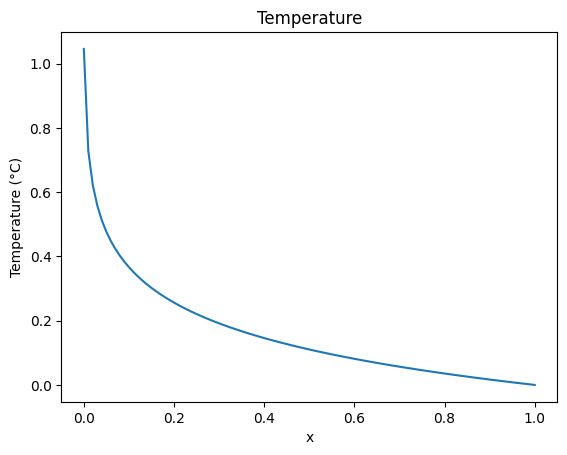

In [17]:
# Extract values along line
# Space axis for plotting
length = np.linspace(0, 1, 101)

# Draws a line through the domain for sampling results
z_axis=[(i, 0.5, 0) for i in length]

timestep = 1
temp_ax = pvdfile_ax.read_set_data(timestep, "temperature", pointsetarray=z_axis)


plt.plot(length, temp_ax)
plt.title("Temperature")
plt.xlabel("x")
plt.ylabel("Temperature (°C)")
plt.show()

The error and relative error shows the same behaviour like in the simulation models above.  
Outside of the center, that has a singularity in the analytical solution, the errors decreases very fast.


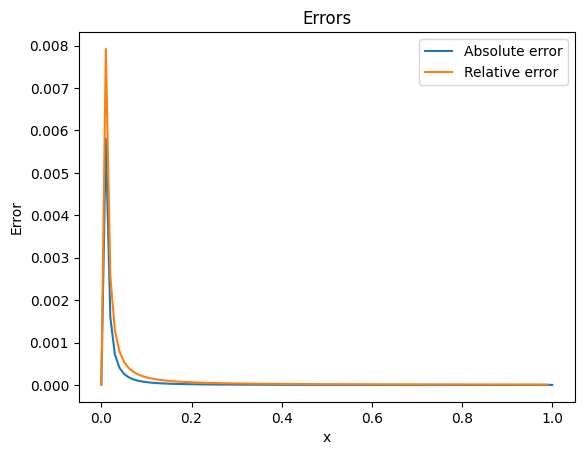

In [23]:
# Create the reference temperature and combine analytical solution with numerical solution at singularity in (x,y)=(0,0)
t_ref = t_analytical(length[1:],0)
t_ref = np.insert(t_ref, 0, temp_ax[0])

plt.plot(length, t_ref-temp_ax, label = "Absolute error")
plt.plot(length[:-1], (t_ref[:-1]-temp_ax[:-1])/t_ref[:-1], label = "Relative error")
plt.title("Errors")
plt.ylabel("Error")
plt.xlabel("x")
plt.legend()
plt.show()

### Input files

The project file for the described model is
[line_source_term_in_cylinder.prj](https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/Parabolic/T/3D_line_source_term_tests/3D_line_source_term_in_cylinder_axisymmetric/line_source_term_in_cylinder.prj).

